In [68]:
import weaviate
import json
from IPython.display import Image

In [ ]:
client = weaviate.Client('http://localhost:8080/')

In [20]:
schema = {
    'classes': [{
        'class':'Meme',
        'vectorizer':'img2vec-neural',
        'vectorIndexType':'hnsw',
        'moduleConfig': {
            'img2vec-neural':{
                'imageFields': [
                    'image'
                ]
            }
        },
        'properties':[
            {
                'name':'image',
                'dataType':['blob']
            },
            {
                'name':'text',
                'dataType':['string']
            }
        ]
    }]
}
client.schema.create(schema)

In [57]:
encoded_image = weaviate.util.image_encoder_b64('image.jpg')

kermit = {
    'name':'kermit the frog',
    'image':encoded_image
}

client.batch.configure(
    batch_size=1, # int value for batch_size enables auto-batching, see Batch configuration section below
)

client.batch.add_data_object(kermit,'Meme')

'4d8b35dd-8415-402f-9875-7ebf95ef49df'

kermit the frog


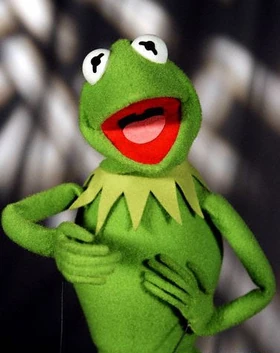

In [82]:
test = weaviate.util.image_encoder_b64('image2.jpg')

sourceImage = { "image": test}

result = (
    client.query
    .get('Meme',['name','image'])
    .with_near_image(sourceImage, encode=False)
    .with_limit(1)
    .do()
)

result_name = result['data']['Get']['Meme'][0]['name']
print(result_name)
Image('image2.jpg')

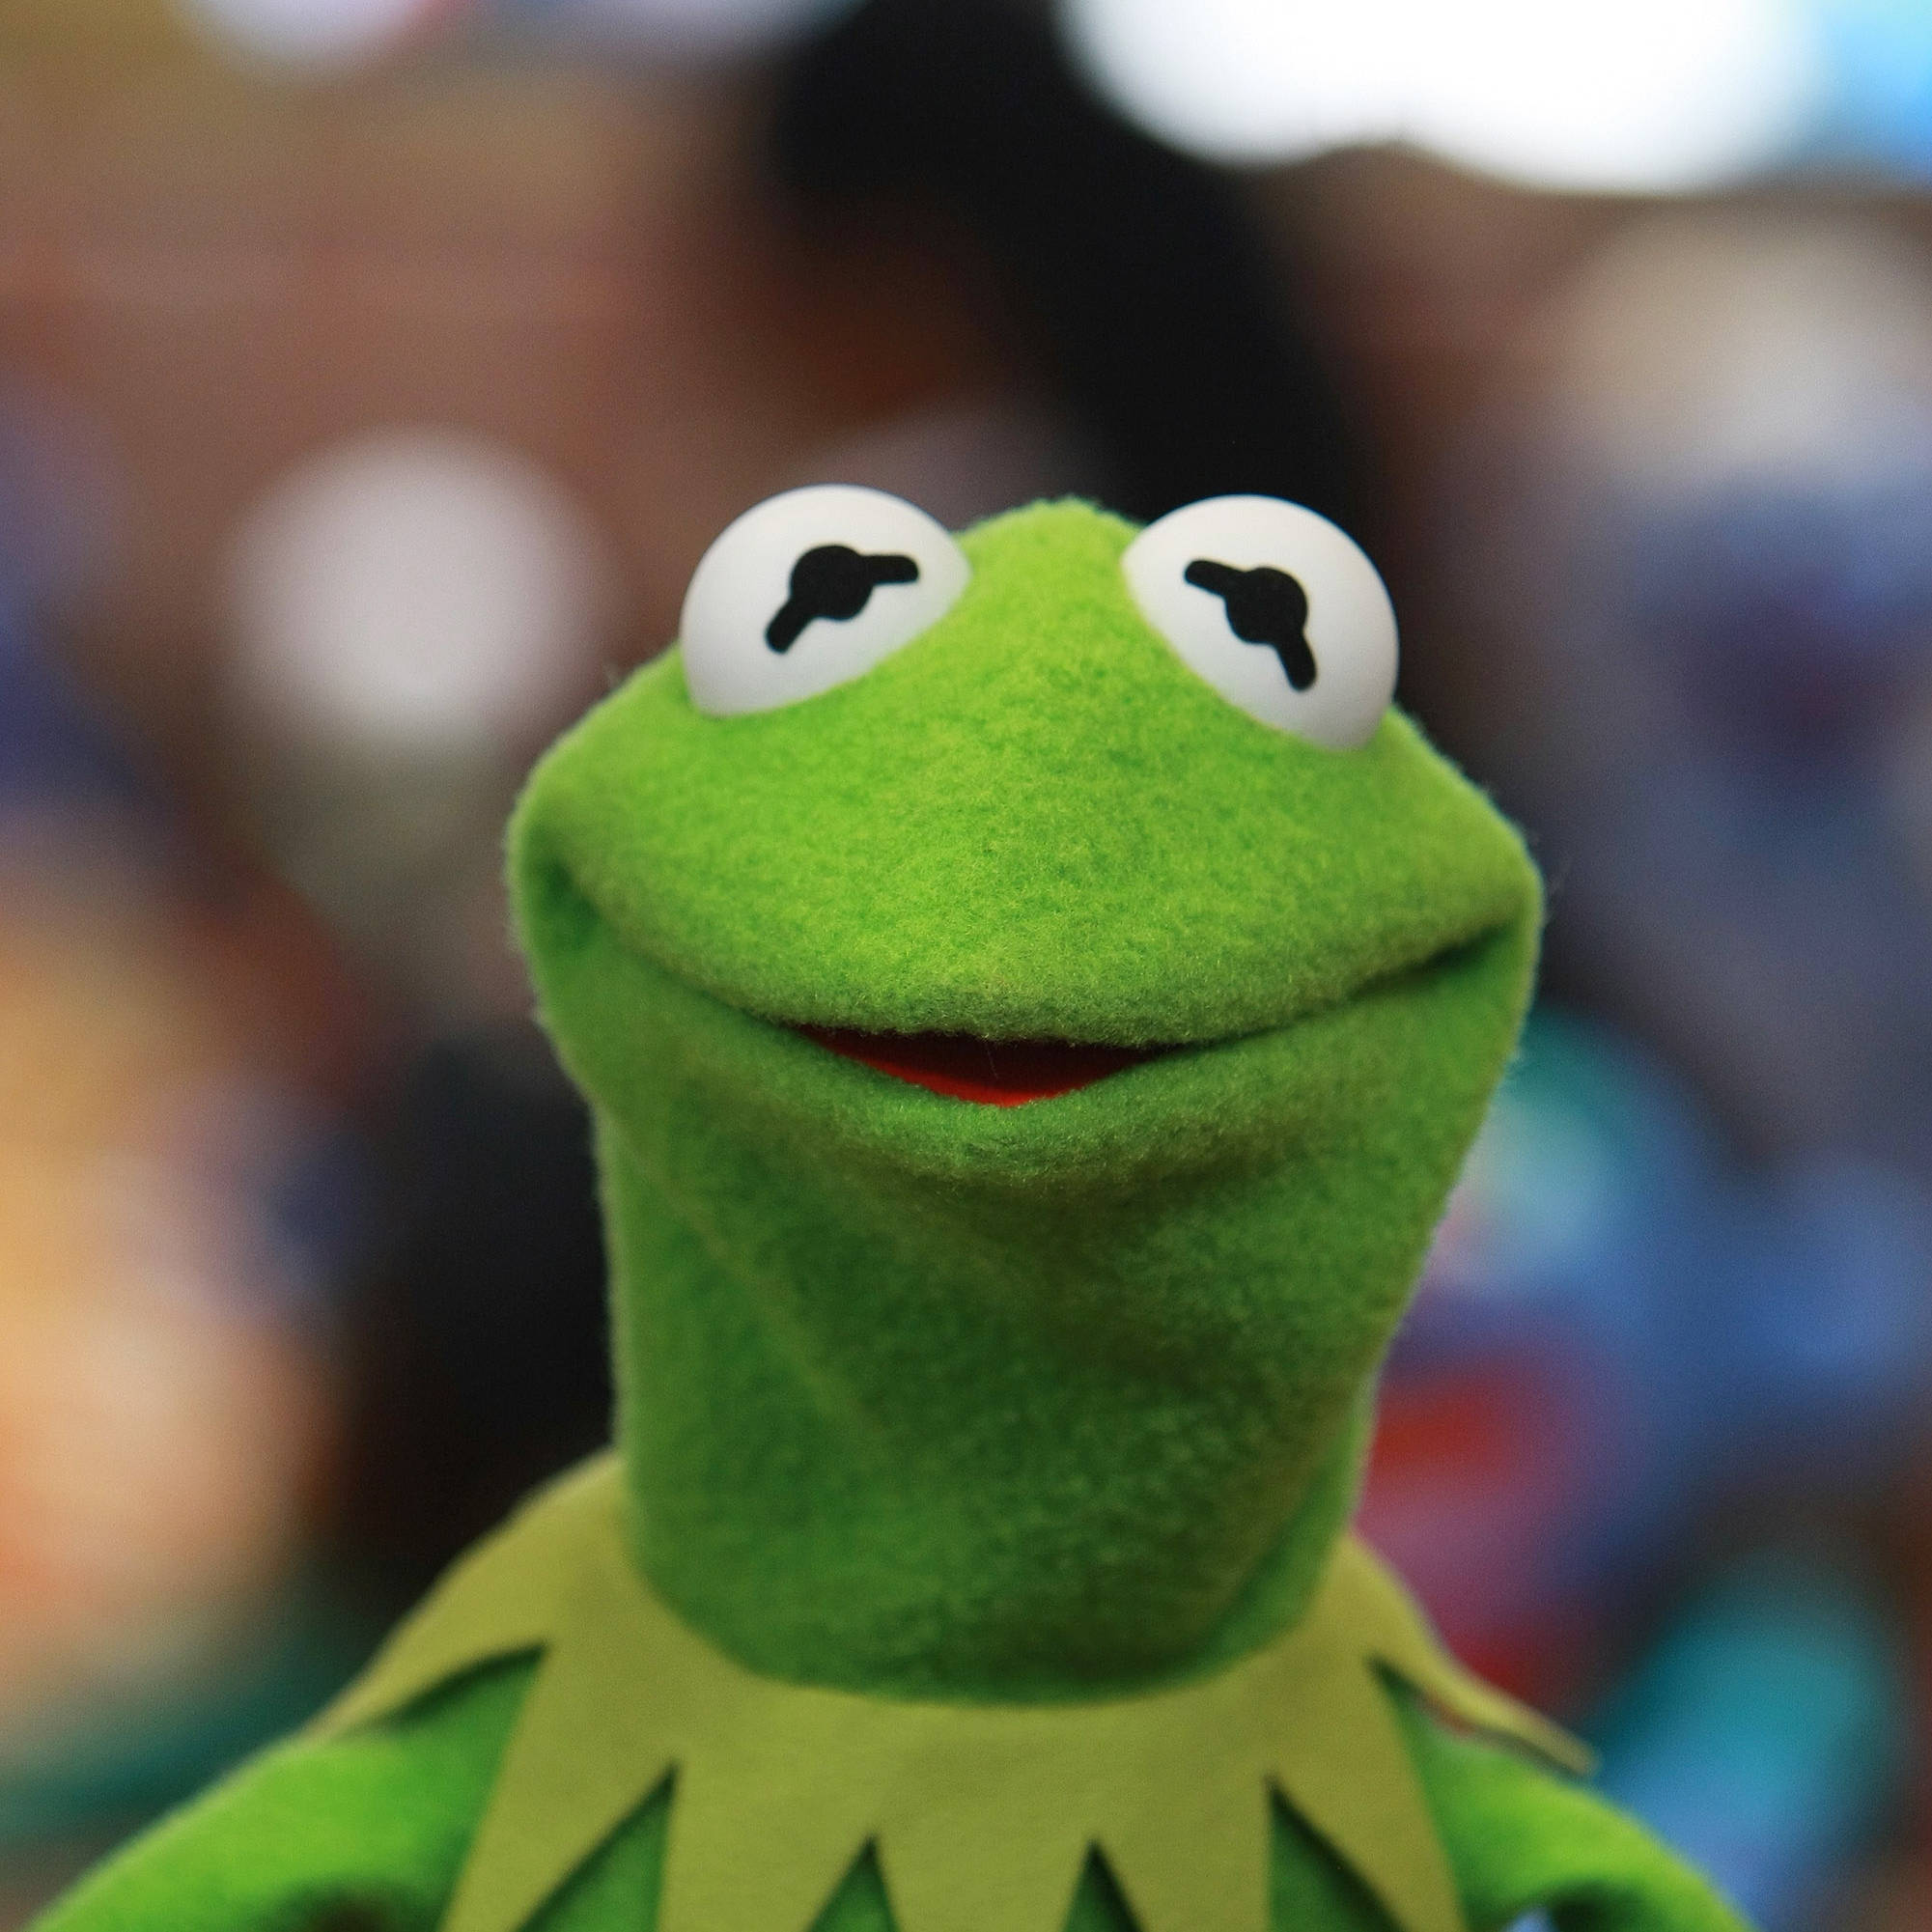

In [76]:
result_image = result['data']['Get']['Meme'][0]['image']
output_image = weaviate.util.image_decoder_b64(result_image)
Image(output_image)